In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
train = pd.read_excel('Data_Train.xlsx')



In [12]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [16]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [18]:
a = np.log(train['COST'])

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [21]:
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [22]:
test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [23]:
train['TITLE'].nunique()

113

In [24]:
train['RESTAURANT_ID'].nunique()

11892

In [27]:
print(train['CUISINES'].nunique())
print(train['TIME'].nunique())
print(train['CITY'].nunique())
print(train['LOCALITY'].nunique())
print(train['RATING'].nunique())
print(train['VOTES'].nunique())

4155
2689
359
1416
32
1847


In [28]:
train.shape

(12690, 9)

In [29]:
test.shape

(4231, 8)

In [30]:
train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [31]:
train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


Count values are same in both the column so dataset is looking perfect.
Mean is greater than median so there is left skewness are present.
There is huge difference between in 75% and max value in COST so outliers are present in the data set.




In [34]:
train['COST'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12690, dtype: int64>

<AxesSubplot:>

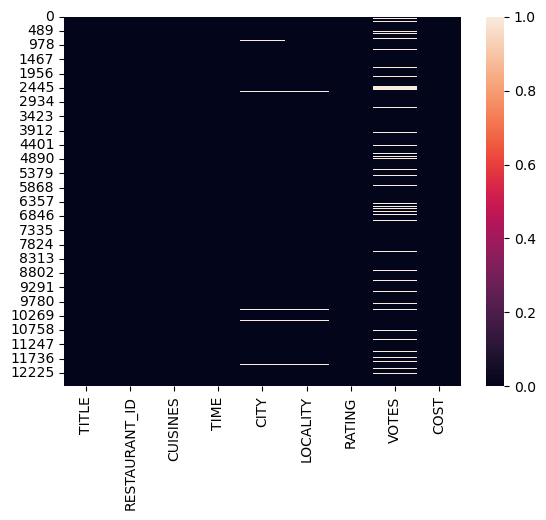

In [37]:
sns.heatmap(train.isnull())

In [39]:
traincor = train.corr()
traincor

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


<AxesSubplot:xlabel='RATING'>

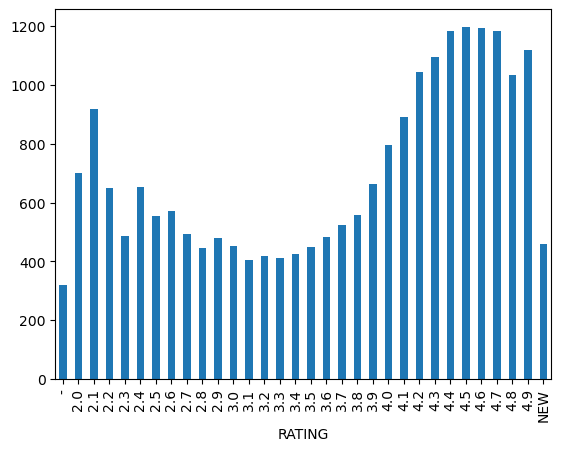

In [40]:
train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

<AxesSubplot:xlabel='RATING'>

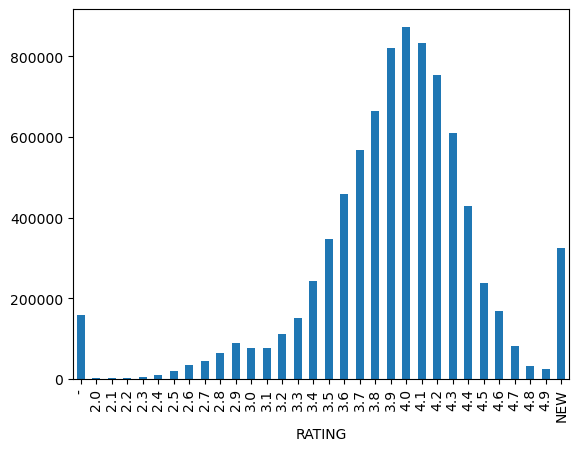

In [41]:
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [42]:
train['CITY'].value_counts()

Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: CITY, Length: 359, dtype: int64

In [43]:
train[train['CITY'] == 'Mumbai']['COST'].mean()

865.2729384436701

In [44]:
train[train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [45]:
train[train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [46]:
train['RATING'] = train['RATING'].astype('object')
# for test set
test['RATING'] = test['RATING'].astype('object') # replace the rating

In [47]:
train['RATING'] = train['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating
# for test set
test['RATING'] = test['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

In [48]:
train['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [49]:
train['RATING'] = train['RATING'].astype(float) # replace the rating
# for test set
test['RATING'] = test['RATING'].astype(float) # replace the rating

# To check the Missing Values

In [50]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [51]:
train['source']= 'train'
test['source'] = 'test'

In [52]:
data=pd.concat([train, test],ignore_index=True)

In [53]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [54]:
new1_test = data["VOTES"].str.split(" ", n = 1, expand =True) 

In [55]:
data['votes_no'] = new1_test[0]
data['votes'] = new1_test[1]

In [56]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,votes_no,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,24,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,165,votes


In [57]:
data['votes_no'] = data['votes_no'].fillna(44.0) # filling with mode
data['RATING'] = data['RATING'].fillna(3.8) # filling with the median 
data['LOCALITY'] = data['LOCALITY'].fillna('Gachibowli')
data['CITY'] = data['CITY'].fillna('Chennai')

Dropping values:

In [58]:
data = data.drop(['VOTES', 'votes'], axis=1)

# Feature Engineering:

# Conversion of Data

In [59]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (16921, 10)


In [60]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no
0,34,9438,3294,898,400,328,3.6,1200.0,train,49
1,36,13198,364,2301,75,1214,4.2,1500.0,train,30
2,34,10915,3729,806,75,1272,3.8,800.0,train,221
3,104,6346,5156,340,277,161,4.1,800.0,train,24
4,55,15387,2218,750,277,709,3.8,300.0,train,165


In [61]:
Train = data.loc[data['source']=='train']
Test = data.loc[data['source']=='test']

In [62]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

In [63]:
Train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no
0,34,9438,3294,898,400,328,3.6,1200.0,49
1,36,13198,364,2301,75,1214,4.2,1500.0,30
2,34,10915,3729,806,75,1272,3.8,800.0,221
3,104,6346,5156,340,277,161,4.1,800.0,24
4,55,15387,2218,750,277,709,3.8,300.0,165


In [64]:
Test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,votes_no
12690,34,4085,3878,1417,323,1314,4.3,564
12691,104,12680,4879,2548,277,429,4.2,61
12692,34,1411,4333,614,277,774,3.8,350
12693,95,204,631,2955,128,846,3.8,1445
12694,104,13453,4891,586,216,570,3.6,23


In [65]:
X = Train.drop('COST', axis=1)
y = a

In [109]:
X_train.shape

(10152, 8)

In [110]:
y_train.shape

(10152,)

In [111]:
X_test.shape

(4231, 8)

In [112]:
y_test.shape

(2538,)

In [66]:
from sklearn.linear_model import Ridge

In [67]:
r = Ridge()
r.fit(X, y)

Ridge()

In [68]:
pred = r.predict(X)
pred


array([6.42861949, 6.36301048, 6.44866569, ..., 6.23142637, 6.32598935,
       6.45777378])

In [69]:
x_test = Test

In [70]:
test_pred = r.predict(x_test)

In [71]:
## Converting price back to original scale and making it integer
Predict=np.exp(test_pred)
Predict=Predict.astype(int)

In [72]:
a =pd.DataFrame(Predict, columns=['COST'])
a

,COST
0,737
1,408
2,651
3,427
4,377
...,...
4226,693
4227,397
4228,329
4229,199


In [73]:
a.to_excel('cost1.xlsx')

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.3818801265091046
R-squared: 0.26219192848748374


In [97]:
r = Ridge()

In [98]:
r.fit(X, y)

Ridge()

In [99]:
pred = r.predict(X)

In [100]:
pred

array([6.42861949, 6.36301048, 6.44866569, ..., 6.23142637, 6.32598935,
       6.45777378])

In [101]:
X_test= Test
test_pred = r.predict(x_test)
# Converting price back to original scale and making it integer
Predict=np.exp(test_pred)
Predict=Predict.astype(int)
a =pd.DataFrame(Predict, columns=['COST'])
a

,COST
0,737
1,408
2,651
3,427
4,377
...,...
4226,693
4227,397
4228,329
4229,199


In [103]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [105]:
y_pred = rf_regressor.predict(X_test)

In [113]:
#Remove extra samples from X_test and y_test
X_test = X_test[:len(y_test)]
y_test = y_test[:len(X_test)]


In [114]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (2538, 8)
y_test shape: (2538,)


In [116]:
y_pred = rf_regressor.predict(X_test)

In [117]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [118]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.8743738489564278
R-squared: -0.6893261484350577


In [119]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8097494676804033


In [123]:
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.378110553711506


Random Forest Regressor shows the highest cost value is 87.5 approx. 